In [264]:
# importing necessary libraries
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import missingno as msn

In [265]:
# loading dataset
df= pd.read_csv('unicorn-companies.csv')

# display first 10 rows
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [266]:
# identify the shape of dataset
df.shape

(1074, 10)

In [267]:
# check the unique of each columns to find missing values that not specified with NaN
columns_list = ['Valuation', 'Industry', 'City', 'Country', 'Continent', 'Year Founded', 'Funding', 'Select Investors']

column_objects = {}

for column_name in columns_list:
    column_objects[column_name] = df[column_name].unique()

print(column_objects)

{'Valuation': array(['$180B', '$100B', '$95B', '$46B', '$40B', '$39B', '$38B', '$33B',
       '$32B', '$27B', '$25B', '$22B', '$20B', '$18B', '$17B', '$15B',
       '$14B', '$13B', '$12B', '$11B', '$10B', '$9B', '$8B', '$7B', '$6B',
       '$5B', '$4B', '$3B', '$2B', '$1B'], dtype=object), 'Industry': array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object), 'City': array(['Beijing', 'Hawthorne', 'Shenzhen', 'San Francisco', 'Stockholm',
       'Surry Hills', 'London', 'Cary', nan, 'Jacksonville', 'Bengaluru',
       'Jakarta', 'Shanghai', 'Philadelphia', 'Waltham', 'New York',
       'Pittsburgh', 'Istanbul', 'San Diego', 'Rosevill

In [268]:
# replace 'Artificial intelligence' with 'Artificial Intelligence'
df.replace('Artificial intelligence', 'Artificial Intelligence', inplace=True)

In [269]:
# replace Unknown with NaN in data frame
df.replace('Unknown', np.nan, inplace=True)

In [270]:
# identify the data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1062 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [271]:
# find the number of NaN values
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

In [272]:
# display the data frame rows with NaN values
df[df.isnull().any(axis=1)]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
215,SSENSE,$4B,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,NaN,Sequoia Capital
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial Intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
424,Uplight,$2B,2021-03-03,Other,Boulder,United States,North America,2019,NaN,"Rubicon Technology Partners, Max Ventures, Inc..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial Intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
567,ISN,$2B,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,NaN,Blackstone


<AxesSubplot: >

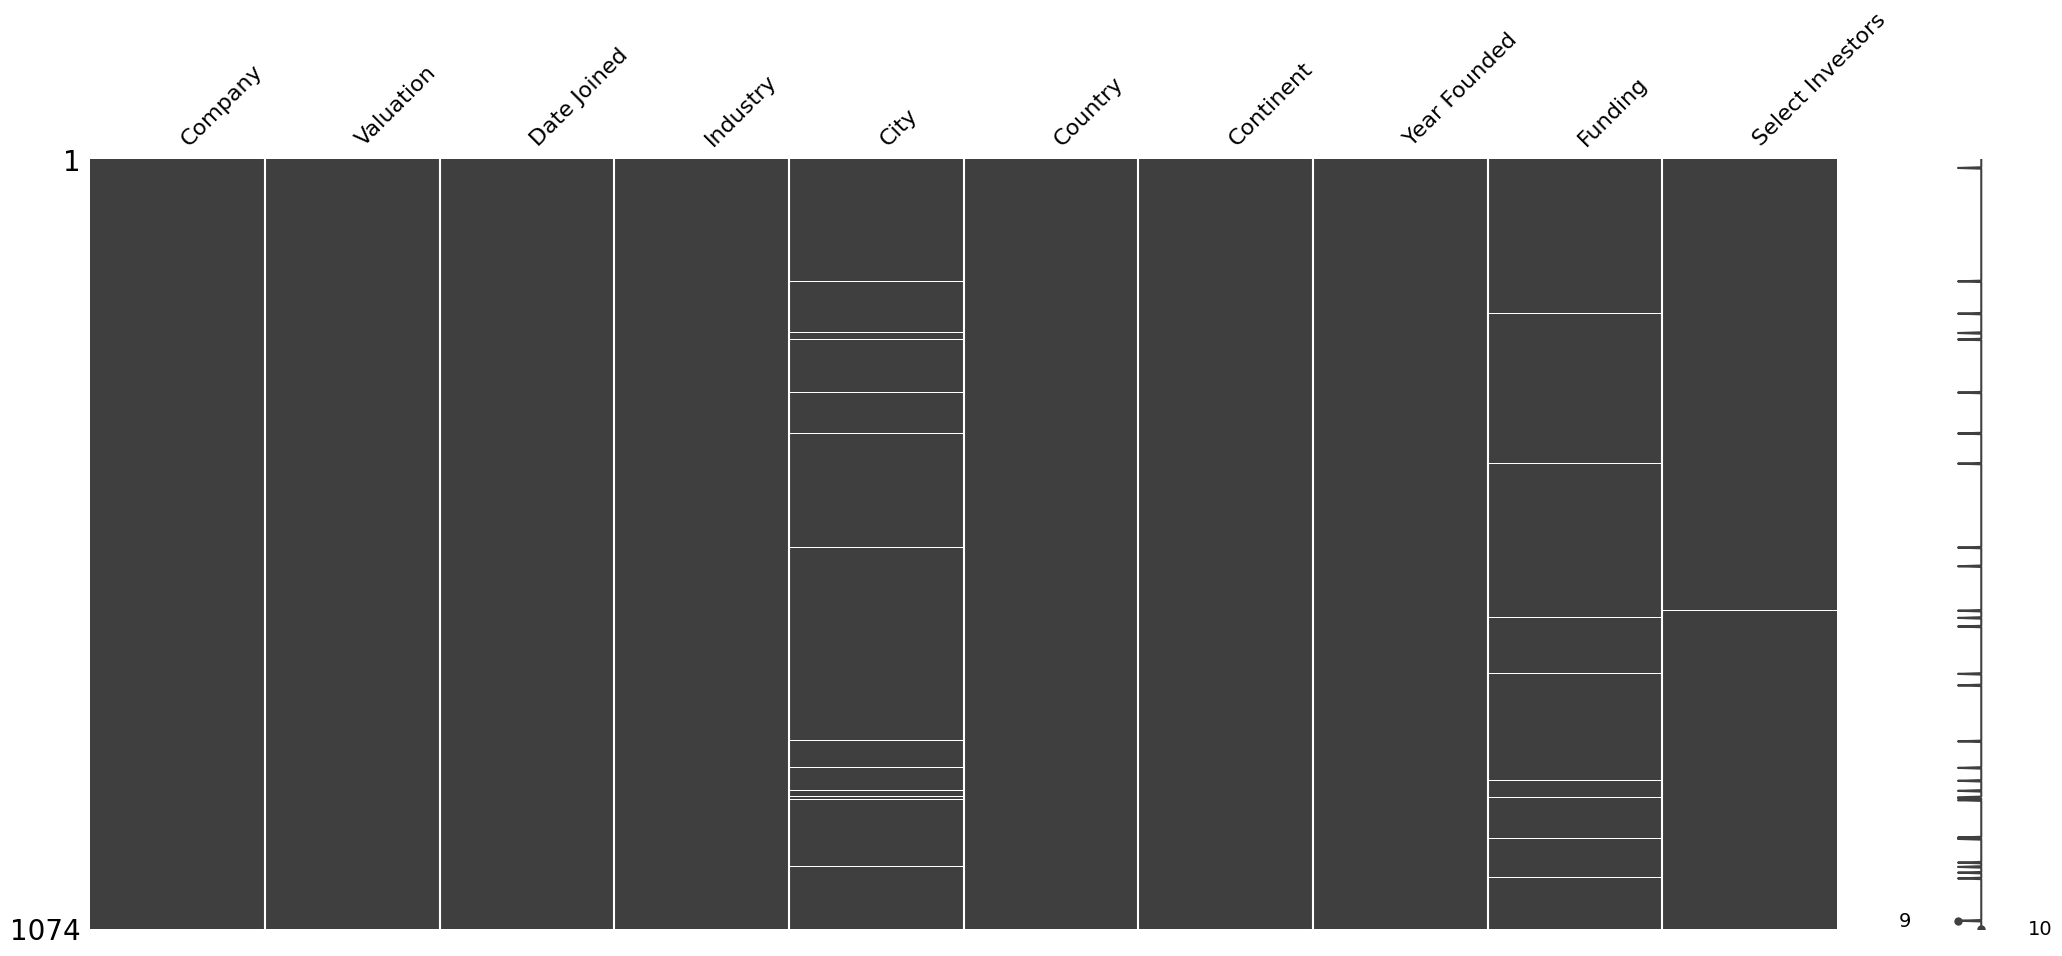

In [273]:
# visualazing the NaN values
msn.matrix(df)

In [274]:
# delete the $ and B
df['Valuation'] = df['Valuation'].str[1:-1]

In [275]:
# change the type of Valuation column from object to int
df['Valuation']= df['Valuation'].astype('int64')

In [276]:
# change the name of column
df.rename(columns={'Valuation': 'Valuation(B$)'}, inplace=True)

In [277]:
# delete the $
df['Funding'] = df['Funding'].str[1:]

In [278]:
# change the values of Funding column
for index, row in df.iterrows():
    funding_value = str(row['Funding'])
    if 'M' in funding_value:
        df.loc[index, 'Funding'] = int(funding_value.replace('M', '')) * 1000000
    elif 'B' in funding_value:
        df.loc[index, 'Funding'] = int(funding_value.replace('B', '')) * 1000000000
    else:
        df.loc[index, 'Funding'] = 'unknown'

In [279]:
# change the name of column
df.rename(columns={'Funding': 'Funding($)'}, inplace=True)

In [280]:
# Convert Funding column to numeric data types
df['Funding($)'] = pd.to_numeric(df['Funding($)'], errors='coerce')
df['Valuation(B$)'] = pd.to_numeric(df['Valuation(B$)'], errors='coerce')

In [281]:
# change the name of column
df.rename(columns={'Funding': 'Funding($)'}, inplace=True)

In [282]:
# Convert the Date Joined column to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [283]:
# check the invalids
df[df['Date Joined'].dt.year < df['Year Founded']]

,Company,Valuation(B$),Date Joined,Industry,City,Country,Continent,Year Founded,Funding($),Select Investors
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,151000000.0,"Phoenix New Media, Tianjin Haihe Industry Fund"


In [284]:
# change invalid year with valid year
df.iloc[714,7]= 2013

In [285]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [286]:
# check the data format again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation(B$)     1074 non-null   int64         
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding($)        1062 non-null   float64       
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 92.3+ KB


- ##### How many unicorn companies are there in the data?
  1073 unicorn companies

In [287]:
# calculate the number of unique values 
df['Company'].nunique()

1073

- ##### In what year have the largest number of companies become unicorns?
  in 2021, 520 companies become unicorn

In [288]:
# the frequency of years in data frame
df['Date Joined'].dt.year.value_counts()

2021    520
2022    116
2020    108
2019    104
2018    103
2017     44
2015     35
2016     21
2014     13
2012      4
2013      3
2011      2
2007      1
Name: Date Joined, dtype: int64

- ##### The value of the unicorns that Tencent Holding invested in until March 2022 How much is it?
    Tencent company $20 billion invested in 8 companies

In [289]:
# find the companies that tencent holdings invested at them
tencent_holdings= df[df['Select Investors'].str.contains('Tencent Holding', na=False)]

# find the companies that tencent holdings invested at them until march 2022
tencent_holdings_until_march= tencent_holdings[tencent_holdings['Date Joined'].dt.month <= 3]
tencent_holdings_until_march

,Company,Valuation(B$),Date Joined,Industry,City,Country,Continent,Year Founded,Funding($),Select Investors
106,Airwallex,6,2019-03-25,Fintech,Melbourne,Australia,Oceania,2015,802000000.0,"DST Global, Sequoia Capital China, Tencent Hol..."
163,Qonto,5,2022-01-11,Fintech,Paris,France,Europe,2016,704000000.0,"Alven Capital, Valar Ventures, Tencent Holdings"
387,Enflame,2,2021-01-05,Hardware,Shanghai,China,Asia,2018,472000000.0,"Tencent Holdings, Delta Capital, Redpoint Vent..."
490,Skydance Media,2,2020-02-11,Other,Santa Monica,United States,North America,2010,275000000.0,"RedBird Capital Partners, CJ ENM, Tencent Hold..."
529,Jeeves,2,2022-03-14,Fintech,Orlando,United States,North America,2019,268000000.0,"Tencent Holdings, CRV, Clocktower Technology V..."
682,Coocaa,1,2018-03-16,Hardware,Shenzhen,China,Asia,2006,218000000.0,"Baidu, Tencent Holdings"
751,Flipdish,1,2022-01-13,Internet software & services,Dublin,Ireland,Europe,2015,157000000.0,"Tencent Holdings, Tiger Global Management, Glo..."
795,Mininglamp Technology,1,2019-03-27,Artificial Intelligence,Beijing,China,Asia,2014,787000000.0,"Russia-China Investment Fund, Tencent Holdings..."


In [290]:
# showing the companies that tencent holding invested at them with value of them
fig = px.bar(tencent_holdings_until_march, x='Company', y='Valuation(B$)', text='Valuation(B$)')
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='Companies Invested by Tencent Holdings Until March', yaxis_title='Valuation (in Billions of Dollars)')
fig.show()

In [291]:
# Calculate the total valuation of Tencent Holdings until March
tencent_holdings_until_march['Valuation(B$)'].sum()

20

- ##### Which three cities host the most unicorns?
  1. San Francisco with 152 companies
  2. New York with 103 companies
  3. Beijing with 63 companies

In [292]:
# Count the number of companies in each city and display the top 3 cities
city_companies_counts= df['City'].value_counts()
city_companies_counts.head(3)

San Francisco    152
New York         103
Beijing           63
Name: City, dtype: int64

In [293]:
# visual the top 3 cities on the map
cities = ["San Francisco", "New York", "Beijing"]
latitudes = [37.7749, 40.7128, 39.9042]
longitudes = [-122.4194, -74.0060, 116.4074]
colors = ['blue', 'green', 'red']

fig = px.scatter_geo(lat=latitudes, lon=longitudes, locationmode="geojson-id", hover_name=cities, text=cities)
fig.update_geos(projection_type="equirectangular")
fig.update_layout(geo=dict(showland=True, showcountries=True, countrycolor="gray", showocean=True, oceancolor="lightblue"))
fig.update_traces(marker=dict(size=10, color=colors))

fig.show()

- ##### How many percent of countries in the world have at least one unicorn company?
  23.59% of countries in the world

In [294]:
# Calculate the percentage of unicorn companies
total_countries= 195
unic_countries= len(df['Country'].value_counts())
percentage_unic_companies= round((unic_countries/total_countries)*100, 2)
percentage_unic_companies

23.59

In [295]:
# visualize the countries with and without unicorns
labels = ['at leat one unicorn', 'do not have unicorn']
values = [46, 149]
fig = px.pie(names=labels, values=values, title='Countries in the world')

fig.show()

- #### Which continent has the second highest number of unicorn companies?
  Asia

In [296]:
df['Continent'].value_counts()

North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Continent, dtype: int64

In [297]:
# visualizing 
df_continents= df['Continent'].value_counts()
fig= px.bar(df_continents)
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='number of unicorn companies in each continent', xaxis_title='continents' , yaxis_title='number of unicorns')
fig.show()

- #### Which country (countries) has the largest number of cities hosting unicorns?
  1. United States
  2. China
  3. India
  4. United Kingdom
  5. Germany

In [298]:
# Calculate the count of cities in each country and display the top 5 countries
city_country_counts = df.groupby(['Country']).size().reset_index(name='City').sort_values(by='City', ascending=False)
city_country_counts.head(5)

,Country,City
44,United States,562
9,China,173
19,India,65
43,United Kingdom,43
17,Germany,26


In [299]:
# visualize the number of unicorn companies in each city within each country
fig= px.bar(city_country_counts, x='Country', y='City', text='City')
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='number of unicorn companies in each City in each country', xaxis_title='countries' , yaxis_title='number of cities')
fig.show()

- #### Which industries have the highest and lowest number of unicorn companies?
  highest is Fintech and lowest is Travel

In [300]:
# Calculate the count of companies in each industry
industry_company_counts = df.groupby(['Industry']).size().reset_index(name='Company').sort_values(by='Company', ascending=False)
industry_company_counts

,Industry,Company
7,Fintech,224
10,Internet software & services,205
5,E-commerce & direct-to-consumer,111
0,Artificial Intelligence,84
9,Health,74
12,Other,58
13,"Supply chain, logistics, & delivery",57
3,Cybersecurity,50
4,Data management & analytics,41
11,Mobile & telecommunications,38


In [301]:
# visualize the number of unicorn companies in each industry
fig= px.bar(industry_company_counts, x='Industry', y='Company', text='Company')
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='number of unicorn companies in each industry', xaxis_title='industry' , yaxis_title='company')
fig.show()

- #### Unicorn companies have more average valuation in which industry?
  in Artificial Intelligence industry have more average

In [302]:
# Get the unique industries from the 'Industry' column of the dataframe
industry_list = list(df['Industry'].unique())

# Calculate the average valuation for a given industry in the dataframe
def AverageVal(df, indus):
 avg_valuation = df[df['Industry'] == indus]['Valuation(B$)'].mean()
 return avg_valuation

# List to store the average valuations for each industry
avg_valuations = []

# Calculate the average valuation for each industry and store the results in avg_valuations
for industry in industry_list:
 avg_valuation = AverageVal(df, industry)
 avg_valuations.append((industry, avg_valuation))

# Sort the avg_valuations list in descending order based on the average valuation
avg_valuations.sort(key=lambda x: x[1], reverse=True)

# Print the average valuation for each industry
for industry, avg_valuation in avg_valuations:
 rounded_avg_valuation = round(avg_valuation, 3)
 print(f"{industry} average: {rounded_avg_valuation}")

Artificial Intelligence average: 4.488
Other average: 4.345
Consumer & retail average: 4.24
Fintech average: 3.938
E-commerce & direct-to-consumer average: 3.838
Edtech average: 3.571
Data management & analytics average: 3.317
Travel average: 3.286
Auto & transportation average: 3.194
Supply chain, logistics, & delivery average: 3.105
Hardware average: 2.912
Internet software & services average: 2.902
Health average: 2.676
Cybersecurity average: 2.58
Mobile & telecommunications average: 2.342


In [303]:
# visualize the average valuation for each industry
indus_list= ['Artificial Intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech','Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail', 'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', 'Travel', 'Cybersecurity', 'Mobile & telecommunications']
avg_list=[4.488, 4.345, 3.838, 3.938, 2.902, 3.105, 4.24, 3.317, 3.571, 2.676, 2.912, 3.194, 3.286, 2.58, 2.342]

fig= px.bar(x=indus_list, y=avg_list, text=avg_list)
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='average valuation of each industry', xaxis_title='industry' , yaxis_title='average valuation($B)')
fig.show()

- #### In what industry have unicorn companies received the most funding?
  in Fintech with $107,996,000,000 funding received

In [304]:
# Filter the dataframe to select rows where 'Funding($)' column is not null
df_funding_received= df[df['Funding($)'] != np.nan]

In [305]:
# identify the shape of this data frame
df_funding_received.shape

(1074, 10)

In [306]:
# Get the unique industries from the 'Industry' column of the filtered dataframe
industry_list = list(df_funding_received['Industry'].unique())

# Calculate the total funding for a given industry in the filtered dataframe
def FundSum(df_funding_received, indus):
    sum_funding = df_funding_received[df_funding_received['Industry'] == indus]['Funding($)'].sum()
    return sum_funding

# List to store the total funding for each industry
sum_fundings = []

# Calculate the total funding for each industry and store the results in sum_fundings
for industry in industry_list:
    sum_funding = FundSum(df_funding_received, industry)
    sum_fundings.append((industry, sum_funding))

# Sort the sum_fundings list in descending order based on the total funding
sum_fundings.sort(key=lambda x: x[1], reverse=True)

# Print the total funding for each industry
for industry, sum_funding in sum_fundings:
    print(f"{industry} sum: {sum_funding}")

Fintech sum: 107996000000.0
E-commerce & direct-to-consumer sum: 74437000000.0
Internet software & services sum: 72955000000.0
Artificial Intelligence sum: 46802000000.0
Supply chain, logistics, & delivery sum: 44393000000.0
Other sum: 40044000000.0
Auto & transportation sum: 35074000000.0
Health sum: 33944000000.0
Consumer & retail sum: 25492000000.0
Cybersecurity sum: 21932000000.0
Edtech sum: 21875000000.0
Hardware sum: 21385000000.0
Data management & analytics sum: 17981000000.0
Mobile & telecommunications sum: 14884000000.0
Travel sum: 12626000000.0


In [307]:
# visualize the funding for each industry
indus_list= ['Artificial Intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech','Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail', 'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', 'Travel', 'Cybersecurity', 'Mobile & telecommunications']

fund_list=[46802000000, 40044000000, 74437000000, 107996000000, 72955000000, 44393000000, 25492000000, 17981000000, 21875000000, 33944000000, 21385000000, 35074000000, 12626000000, 21932000000, 14884000000]

fig= px.bar(x=indus_list, y=fund_list)
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='funding of each industry', xaxis_title='industry', yaxis_title='funding($)')
fig.show()

- #### What company has the longest time interval from establishment to becoming a unicorn?
  Otto Bock HealthCare with 98 years interval

In [308]:
interval= df['Date Joined'].dt.year - df['Year Founded']
company= df['Company']
interval_df= pd.concat([interval, company], axis=1)
interval_df= interval_df.rename(columns={0: 'Interval'})
interval_df= interval_df.sort_values(by='Interval', ascending=False)
interval_df.head(10)

,Interval,Company
189,98,Otto Bock HealthCare
373,37,Promasidor Holdings
699,37,Five Star Business Finance
1043,28,Thirty Madison
840,27,Radius Payment Solutions
11,27,Epic Games
129,26,Howden Group Holdings
79,25,Caris Life Sciences
377,25,BGL Group
360,24,Carzone


In [309]:
# visualizing the top 10 biggest interval
interval_df_top10= interval_df.head(10)
fig= px.bar(interval_df_top10, x='Company', y='Interval')
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='interval between year founded and year joined for each company', xaxis_title='company', yaxis_title='interval')
fig.show()

- #### On average, how many years does it take from the establishment of a company to turn into a unicorn?
  7 years

In [310]:
# Calculate the mean of the 'Interval' column
round(interval_df['Interval'].mean(), 2)

7.01

- #### Has the time interval between the establishment and the unicornization of companies changed over time?
Yes, with the passage of time, the interval between the companies becoming a unicorn and the year of their establishment will decrease

In [311]:
# creating a data frame
date_joined= df['Date Joined'].dt.year
year_founded= df['Year Founded']
interval= interval_df['Interval']
df_interval= pd.concat([interval, date_joined, year_founded], axis=1)
df_interval = df_interval.sort_values('Interval', ascending=False)
df_interval

,Interval,Date Joined,Year Founded
189,98,2017,1919
373,37,2016,1979
699,37,2021,1984
1043,28,2021,1993
840,27,2017,1990
...,...,...,...
1001,0,2020,2020
546,0,2012,2012
161,0,2019,2019
822,0,2021,2021


In [312]:
# heatmap of correlation
df_heatmap= df_interval.corr()
fig = px.imshow(df_heatmap, text_auto=True, color_continuous_scale='ylgnbu')
fig.show()

In [313]:
# visualazing the companies year founded and joined 
fig= px.scatter(df_interval, y='Year Founded', x='Date Joined', color='Interval',trendline='lowess')
fig.show()

- #### In which industry(s) have companies become unicorns the fastest?
  1. Auto & transportation
  2. Artificial Intelligence
  3. Hardware

In [314]:
# create a data frame
insdustry= df['Industry']
df_interval= pd.concat([interval, date_joined, year_founded, insdustry], axis=1)
df_interval= df_interval.rename(columns={0: 'Interval'})
df_interval

,Interval,Date Joined,Year Founded,Industry
189,98,2017,1919,Health
373,37,2016,1979,Consumer & retail
699,37,2021,1984,Other
1043,28,2021,1993,Health
840,27,2017,1990,Fintech
...,...,...,...,...
1001,0,2020,2020,Other
546,0,2012,2012,Artificial Intelligence
161,0,2019,2019,Auto & transportation
822,0,2021,2021,E-commerce & direct-to-consumer


In [315]:
# Define a function to calculate the average interval for a given industry
def IndusMean(indus):
    return (df_interval[df_interval['Industry'] == indus]['Interval']).mean()

# Create an empty dictionary to store the average intervals for each industry
industry_means = {}

# Iterate through the list of industries
for i in industry_list:
    # Call the `IndusMean` function for each industry and store the result in the `industry_means` dictionary
    industry_means[i] = IndusMean(i)

# Sort the `industry_means` dictionary based on the average interval values in ascending order
sorted_industry_means = sorted(industry_means.items(), key=lambda x: x[1])

# Iterate through the sorted list and print each industry along with its corresponding average interval
for industry, mean in sorted_industry_means:
    print(f"{industry}: Average Interval = {mean}")

Auto & transportation: Average Interval = 5.032258064516129
Artificial Intelligence: Average Interval = 5.892857142857143
Hardware: Average Interval = 5.9411764705882355
E-commerce & direct-to-consumer: Average Interval = 6.4324324324324325
Mobile & telecommunications: Average Interval = 6.526315789473684
Fintech: Average Interval = 6.544642857142857
Travel: Average Interval = 6.571428571428571
Cybersecurity: Average Interval = 6.8
Supply chain, logistics, & delivery: Average Interval = 6.9298245614035086
Edtech: Average Interval = 7.714285714285714
Other: Average Interval = 7.775862068965517
Internet software & services: Average Interval = 7.868292682926829
Data management & analytics: Average Interval = 8.073170731707316
Consumer & retail: Average Interval = 8.08
Health: Average Interval = 8.18918918918919


In [316]:
# visualize the average of interval for each industry
indus_list= ['Artificial Intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech','Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail', 'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', 'Travel', 'Cybersecurity', 'Mobile & telecommunications']

avg_interval_list=[5.892857142857143,7.775862068965517,6.4324324324324325,6.544642857142857,7.868292682926829,6.9298245614035086,8.08,8.073170731707316,7.714285714285714, 8.18918918918919, 5.9411764705882355, 5.032258064516129,6.571428571428571, 6.8, 6.526315789473684]
avg_interval_list = [round(x, 2) for x in avg_interval_list]
fig= px.bar(x=indus_list, y=avg_interval_list, text=avg_interval_list)
fig.update_layout(xaxis={'categoryorder': 'total descending'}, title='average of interval for each industry', xaxis_title='industry', yaxis_title='average year interval')
fig.show()

- #### Which is the oldest company (companies) whose value has not yet reached the amount of capital it has attracted by the end of March 2022?
1. Five Star Business Finance (1984)
2. Carzone (1995)
3. Pine Labs
4. Trendy Group International, Starburst (1999)


In [317]:
# filtered data frame
df_filtered = df[(df['Valuation(B$)'] < df['Funding($)']) & (df['Date Joined'].dt.year < 2022) & (df['Date Joined'].dt.month <= 3)].sort_values(by='Year Founded', ascending=True).copy()
df_filtered= df_filtered.head(5)
df_filtered

,Company,Valuation(B$),Date Joined,Industry,City,Country,Continent,Year Founded,Funding($),Select Investors
699,Five Star Business Finance,1,2021-03-26,Other,Chennai,India,Asia,1984,456000000.0,"Sequoia Capital India, Tiger Global Management..."
360,Carzone,2,2019-03-01,E-commerce & direct-to-consumer,Jiangsu,China,Asia,1995,946000000.0,"Alibaba Group,Co-Stone Venture Capital, Buhuo ..."
162,Pine Labs,5,2020-01-24,Fintech,Noida,India,Asia,1998,903000000.0,"Sequoia Capital India, Temasek, PayPal Ventures"
595,Trendy Group International,2,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,200000000.0,L Capital Partners
284,Starburst,3,2021-01-06,Data management & analytics,Boston,United States,North America,1999,414000000.0,"Index Ventures, Coatue Management, Andreessen ..."


In [318]:
# showing the older companies
fig = px.scatter(df_filtered, y='Year Founded', x='Company')
fig.update_layout(title='older companies year founded')
fig.show()

- #### Name the three investors that have invested in the most unicorns
1. Accel
2. General Catalyst
3. Tiger Global Management, Insight Partners

In [319]:
# filtered data frame
df_select_investors = df['Select Investors'].str.split(',', expand=True).stack().str.strip().value_counts()
df_select_investors = df_select_investors.to_frame().rename(columns={0: 'Count'})
df_select_investors.index.name = 'Investor'
df_select_investors.reset_index(inplace=True)
df_select_investors

,Investor,Count
0,Accel,60
1,Andreessen Horowitz,53
2,Tiger Global Management,53
3,Sequoia Capital China,48
4,Sequoia Capital,47
...,...,...
1249,Lockheed Martin Ventures,1
1250,GAM Holding,1
1251,HOF Capital,1
1252,People Electrical Appliance Group China,1


In [320]:
# showing 10 investors that invested at companies
df_select_investors= df_select_investors.head(10)
fig= px.bar(df_select_investors, x='Investor', y='Count', text='Count')
fig.update_layout(xaxis={'categoryorder': 'total ascending'}, title='older companies year founded', xaxis_title='investor', yaxis_title= 'number of companies')
fig.show()